In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
import seaborn as sns
from PIL import Image
import pandas as pd
import tensorflow as tf

import keras

import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

from tensorflow.keras.preprocessing import image_dataset_from_directory

2023-11-16 14:30:31.759130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
X_valid = np.load('X_valid.npy')
Y_valid = np.load('Y_valid.npy')
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_valid shape: " + str(X_valid.shape))
print ("Y_valid shape: " + str(Y_valid.shape))

X_train shape: (2134, 600)
Y_train shape: (2134, 6)
X_valid shape: (1424, 600)
Y_valid shape: (1424, 6)


In [8]:
def DNN1_model(input_shape, r):
    """
    Implements the forward propagation for the model:
    600 -> 30 -> 6
    
    Arguments:
    input_sig -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    
    input_sig = tf.keras.Input(shape=input_shape)
    
    ## 1st hidden layer: 30 units
    F1 = tfl.Dense(units = 100, 
                   kernel_regularizer=tf.keras.regularizers.L2(r),
                   activation = 'relu')(input_sig)
    
    ## 6 neurons in output layer." 
    outputs = tfl.Dense(units=6, 
                        kernel_regularizer=tf.keras.regularizers.L2(r),
                        activation='softmax')(F1)
    # YOUR CODE STARTS HERE
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_sig, outputs=outputs)
    return model

In [23]:
R = [0.001, 0.0033, 0.01, 0.03, 0.1]
train_accuracy = []
val_accuracy = []
for r in R:
    model = DNN1_model(600, r)
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs=200)
    train_accuracy.append(model.evaluate(X_train, Y_train)[1])
    val_accuracy.append(model.evaluate(X_valid, Y_valid)[1])

Epoch 1/200
67/67 [==============================] - 1s 5ms/step - loss: 1.6845 - accuracy: 0.4133 - val_loss: 1.5149 - val_accuracy: 0.4656
Epoch 2/200
67/67 [==============================] - 0s 3ms/step - loss: 1.3917 - accuracy: 0.5244 - val_loss: 1.4043 - val_accuracy: 0.5323
Epoch 3/200
67/67 [==============================] - 0s 3ms/step - loss: 1.2669 - accuracy: 0.5745 - val_loss: 1.3475 - val_accuracy: 0.5506
Epoch 4/200
67/67 [==============================] - 0s 3ms/step - loss: 1.1993 - accuracy: 0.5993 - val_loss: 1.3218 - val_accuracy: 0.5428
Epoch 5/200
67/67 [==============================] - 0s 3ms/step - loss: 1.1509 - accuracy: 0.6143 - val_loss: 1.2750 - val_accuracy: 0.5562
Epoch 6/200
67/67 [==============================] - 0s 3ms/step - loss: 1.1119 - accuracy: 0.6364 - val_loss: 1.2558 - val_accuracy: 0.5794
Epoch 7/200
67/67 [==============================] - 0s 3ms/step - loss: 1.0727 - accuracy: 0.6471 - val_loss: 1.2388 - val_accuracy: 0.5787
Epoch 8/200
6

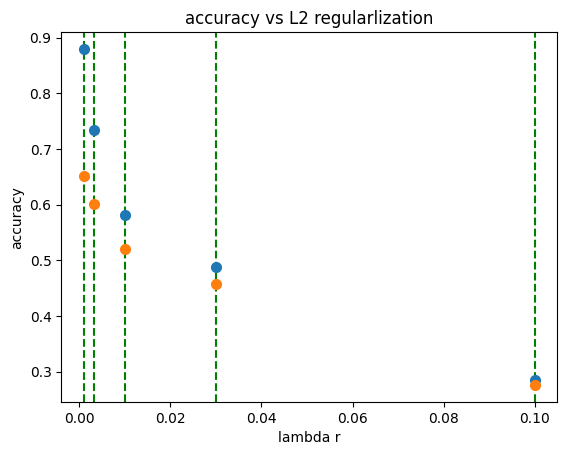

In [29]:
for r in R:
    plt.axvline(r, color="green", linestyle="--")
plt.plot(R, train_accuracy, '.', markersize=14)
plt.plot(R, val_accuracy, '.', markersize=14)
plt.xlabel('lambda r')
plt.ylabel('accuracy')
plt.title('accuracy vs L2 regularlization')
plt.show()


In [11]:
%%time 
history = model.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs=50)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


67/67 [==============================] - 1s 5ms/step - loss: 2.5793 - accuracy: 0.4072 - val_loss: 1.9535 - val_accuracy: 0.4277
Epoch 2/50
67/67 [==============================] - 0s 3ms/step - loss: 1.7131 - accuracy: 0.5248 - val_loss: 1.6417 - val_accuracy: 0.4902
Epoch 3/50
67/67 [==============================] - 0s 3ms/step - loss: 1.5284 - accuracy: 0.5520 - val_loss: 1.5419 - val_accuracy: 0.5105
Epoch 4/50
67/67 [==============================] - 0s 3ms/step - loss: 1.4602 - accuracy: 0.5539 - val_loss: 1.5178 - val_accuracy: 0.5197
Epoch 5/50
67/67 [==============================] - 0s 3ms/step - loss: 1.4251 - accuracy: 0.5679 - val_loss: 1.4730 - val_accuracy: 0.5309
Epoch 6/50
67/67 [==============================] - 0s 2ms/step - loss: 1.4108 - accuracy: 0.5623 - val_loss: 1.5028 - val_accuracy: 0.5077
Epoch 7/50
67/67 [==============================] - 0s 3ms/step - loss: 1.4032 - accuracy: 0.5614 - val_loss: 1.4586 - val_accuracy: 0.5218
Epoch 8/50
67/67 [=============

/var/folders/by/qp26tbnd50dg2yrr86m09rzm0000gn/T/ipykernel_5225/1602424045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/var/folders/by/qp26tbnd50dg2yrr86m09rzm0000gn/T/ipykernel_5225/1602424045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

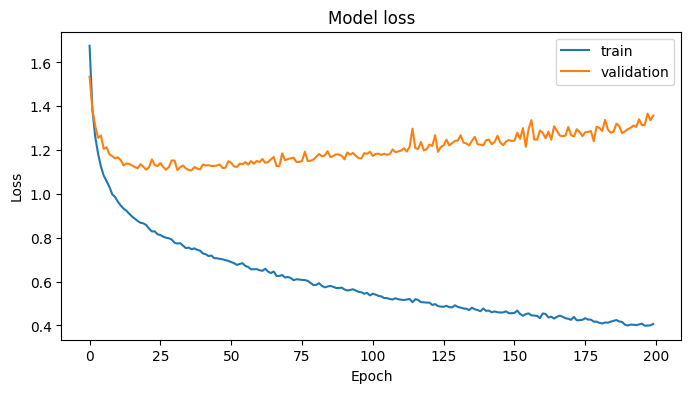

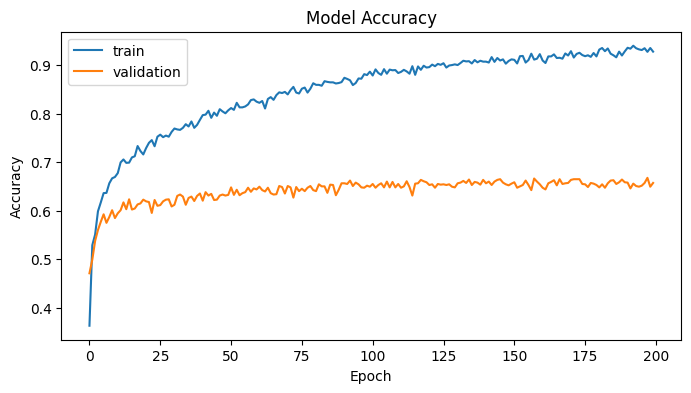

In [105]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(8,4)).set(xlabel='Epoch',ylabel='Loss')
plt.savefig('1000_Loss')
df_acc.plot(title='Model Accuracy',figsize=(8,4)).set(xlabel='Epoch',ylabel='Accuracy')


45/45 [==============================] - 0s 1ms/step


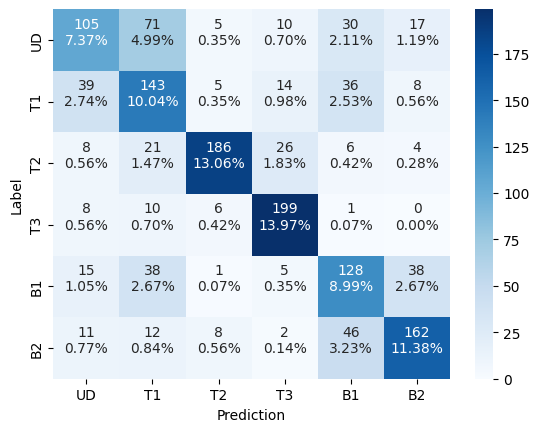

<Figure size 1000x800 with 0 Axes>

In [79]:
y_pred = model.predict(X_valid)       
# Convert OHE back to regular 
y_pred = tf.argmax(y_pred, axis=1)     
## True Labels
y_true = tf.argmax(Y_valid, axis=1) 

# Confusion Matrix
cf_matrix = np.array(tf.math.confusion_matrix(y_true, y_pred))

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(6,6)

ax = sns.heatmap(cf_matrix,
                 xticklabels=["UD", "T1", "T2","T3","B1", "B2"],
                 yticklabels=["UD", "T1", "T2","T3","B1", "B2"],
                 annot=labels, fmt='', cmap='Blues')

plt.xlabel('Prediction')
plt.ylabel('Label')
plt.figure(figsize=(10, 8))
plt.savefig('1000_confusion')
